
# Analytical Solution for Linear Regression with Scikit-Learn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
pd.set_option("display.float_format", lambda x: "%.2f" % x)
df = pd.read_csv("advertising.csv")



#Shape
print(df.shape)  # (200, 4)



#Advertising data shows the sales amounts of a product (in thousands of units)
#and the budget allocated (in thousands of dollars) to TV, radio and newspaper
#for the advertisement of that product.
print(df.head())
'''
      TV  radio  newspaper  sales
0 230.10  37.80      69.20  22.10
1  44.50  39.30      45.10  10.40
2  17.20  45.90      69.30   9.30
3 151.50  41.30      58.50  18.50
4 180.80  10.80      58.40  12.90
'''

(200, 4)
      TV  radio  newspaper  sales
0 230.10  37.80      69.20  22.10
1  44.50  39.30      45.10  10.40
2  17.20  45.90      69.30   9.30
3 151.50  41.30      58.50  18.50
4 180.80  10.80      58.40  12.90


'\n      TV  radio  newspaper  sales\n0 230.10  37.80      69.20  22.10\n1  44.50  39.30      45.10  10.40\n2  17.20  45.90      69.30   9.30\n3 151.50  41.30      58.50  18.50\n4 180.80  10.80      58.40  12.90\n'

6.799773449796853
0.04927509566704604
14.19103779985376
31.43732128331987


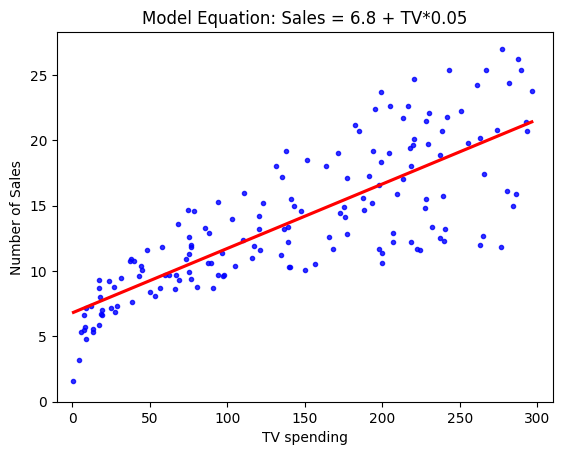

In [ ]:
###############################################
# SIMPLE LINEAR REGRESSION USING OLS
###############################################

X = df[["TV"]]
y = df[["sales"]]




# Model
##################################
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
reg_model = LinearRegression().fit(X_train, y_train)  # y_hat = b0 + b1*TV


# bias (b0)
print(reg_model.intercept_[0])  # 6.799773449796857

# weight of TV (b1)
print(reg_model.coef_[0][0])    # 0.049275095667046





# Prediction
##################################

#Remember our formula: y_hat = 6.799 + 0.049*x
b0 = reg_model.intercept_[0]
b1 = reg_model.coef_[0][0]
y_hat = lambda x: b0 + b1*x


# If we would spend 150 for TV, then how many sales would occur?
print(y_hat(150))  # 14.191


# If we would spend 500 for TV, then how many sales would occur?
print(y_hat(500)) # 31.437





# Model Visualization
##################################
g = sns.regplot(x=X_train, y=y_train, scatter_kws={"color": "b", "s": 9}, ci=False, color="r")

g.set_title(f"Model Equation: Sales = {round(b0, 2)} + TV*{round(b1, 2)}")
g.set_ylabel("Number of Sales")
g.set_xlabel("TV spending")
plt.xlim(-10, 310)
plt.ylim(bottom=0)
plt.show()  #IMAGE IS BELOW (ols.png)

In [ ]:
# Model Evaluation
##############################


#Average y values(sales)
print(f"Average of y values: {y.mean()}")  # 14.02



# Standard Deviation of y values(sales)
print(f"Standard deviation of y values: {y.std()}")  # 5.22



# Train MSE
y_pred = reg_model.predict(X_train)
print(f"Train MSE: {mean_squared_error(y_train, y_pred)}")  # 10.45



# Train RMSE
print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_pred))}")  # 3.23



# Train MAE
print(f"Train MAE: {mean_absolute_error(y_train, y_pred)}")   # 2.55



# Train R-square
print(f"Train R-square: {reg_model.score(X_train, y_train)}")  # 0.63



#Test MSE
y_pred = reg_model.predict(X_test)
print(f"Test MSE: {mean_squared_error(y_test, y_pred)}")  # 10.85



# Test RMSE
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")  # 3.29



# Test MAE
print(f"Test MAE: {mean_absolute_error(y_test, y_pred)}")   # 2.46



# Test R-square
print(f"Test R-square: {reg_model.score(X_test, y_test)}")  # 0.41

Average of y values: sales   14.02
dtype: float64
Standard deviation of y values: sales   5.22
dtype: float64
Train MSE: 10.454336617171423
Train RMSE: 3.233316658969768
Train MAE: 2.557913719781726
Train R-square: 0.6393874827744095
Test MSE: 10.85934532560827
Test RMSE: 3.2953520791575928
Test MAE: 2.4659827815717366
Test R-square: 0.41535307148347855


In [ ]:
###############################################
# MULTIPLE LINEAR REGRESSION USING OLS
###############################################

df = pd.read_csv("advertising.csv")



# In this case, X consists of multiple columns.
y = df[["sales"]]
X = df.drop("sales", axis=1)



print(X.head())
'''
      TV  radio  newspaper
0 230.10  37.80      69.20
1  44.50  39.30      45.10
2  17.20  45.90      69.30
3 151.50  41.30      58.50
4 180.80  10.80      58.40
'''


print(y.head())
'''
   sales
0  22.10
1  10.40
2   9.30
3  18.50
4  12.90
'''



# Model
##########################

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)



print(f"Number of train data: {y_train.shape[0]}")  # 160
print(f"Number of test data: {y_test.shape[0]}")    # 40



reg_model = LinearRegression().fit(X_train, y_train)



# bias
b = reg_model.intercept_[0]
print(b)   # 2.907



# weights
w = reg_model.coef_[0]
print(w)  # [0.0468431  0.17854434 0.00258619]






# Prediction
##########################

# y_hat = b0 + b1*TV + b2*radio + b3*newspaper
y_hat = lambda TV, radio, newspaper : b + TV*w[0] + radio*w[1] + newspaper*w[2]


# What is the expected sales value based on the following observations?
# TV: 30
# radio: 10
# newspaper: 40

print(y_hat(30,10,40))  # 6.202


#We can also use predict() function with our model.
new_Data = [[30], [10], [40]]
new_Data = pd.DataFrame(new_Data)
print(f"Initial shape: {new_Data.shape}")    # (3, 1)
#We need to transpose it before prediction.
new_Data = new_Data.T
print(f"Transposed shape: {new_Data.shape}") # (1, 3)
print(reg_model.predict(new_Data))   #  [[6.202131]]





# Model Evaluation
##################################

# Train RMSE
y_pred = reg_model.predict(X_train)
print(f"RMSE of training set: {np.sqrt(mean_squared_error(y_train, y_pred))}")   # 1.73


# Train R-squared
print(f"R-squared of training set: {reg_model.score(X_train, y_train)}")         # 0.89


# Test RMSE
y_pred = reg_model.predict(X_test)
print(f"RMSE of test set: {np.sqrt(mean_squared_error(y_test, y_pred))}")       # 1.41


# Test R-squared
print(f"R-squared of test set: {reg_model.score(X_test, y_test)}")             # 0.89



# 10 fold CV(Cross Validation) RMSE
print(f"10 fold CV RMSE: {np.mean(np.sqrt(-cross_val_score(reg_model, X, y, cv=10, scoring='neg_mean_squared_error')))}")
# 1.69



# 5 fold CV(Cross Validation) RMSE
print(f"5 fold CV RMSE: {np.mean(np.sqrt(-cross_val_score(reg_model, X, y, cv=5, scoring='neg_mean_squared_error')))}")
# 1.71

      TV  radio  newspaper
0 230.10  37.80      69.20
1  44.50  39.30      45.10
2  17.20  45.90      69.30
3 151.50  41.30      58.50
4 180.80  10.80      58.40
   sales
0  22.10
1  10.40
2   9.30
3  18.50
4  12.90
Number of train data: 160
Number of test data: 40
2.907947020816433
[0.0468431  0.17854434 0.00258619]
6.202130997974466
Initial shape: (3, 1)
Transposed shape: (1, 3)
[[6.202131]]
RMSE of training set: 1.736902590147092
R-squared of training set: 0.8959372632325174
RMSE of test set: 1.4113417558581587
R-squared of test set: 0.8927605914615384
10 fold CV RMSE: 1.6913531708051797
5 fold CV RMSE: 1.7175247278732086


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Starting gradient descent at b = 6.8, w = 0.0493, train mse = 10.454355566898752
After 10000 iterations b = 6.799960376189568, w = 0.04927414167961735, train mse = 10.454336626738776
test mse: 10.85923433749181


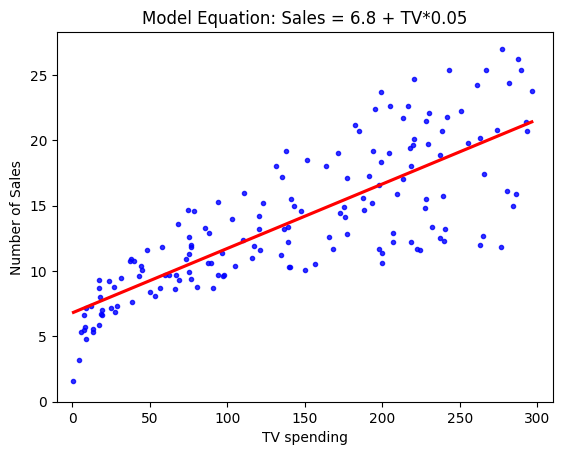

In [ ]:
######################################################
# SIMPLE LINEAR REGRESSION USING GRADIENT DESCENT
######################################################


# Cost function MSE
def cost_function(Y, b, w, X):
    m = len(Y)
    sse = 0

    for i in range(0, m):
        y_hat = b + w * X[i]
        y = Y[i]
        sse += (y_hat - y) ** 2

    mse = sse / m
    return mse



# update_weights
def update_weights(Y, b, w, X, learning_rate):
    m = len(Y)
    b_deriv_sum = 0
    w_deriv_sum = 0
    for i in range(0, m):
        y_hat = b + w * X[i]
        y = Y[i]
        b_deriv_sum += y_hat - y
        w_deriv_sum += (y_hat - y) * X[i]
    new_b = b - (learning_rate * 1 / m * b_deriv_sum)
    new_w = w - (learning_rate * 1 / m * w_deriv_sum)
    return new_b, new_w




# train function
def train(Y, initial_b, initial_w, X, learning_rate, num_iters, print_iter=False):
    print(
        "Starting gradient descent at b = {0}, w = {1}, train mse = {2}".format(
            initial_b, initial_w, cost_function(Y, initial_b, initial_w, X)
        )
    )

    b = initial_b
    w = initial_w
    cost_history = []

    for i in range(num_iters):
        b, w = update_weights(Y, b, w, X, learning_rate)
        mse = cost_function(Y, b, w, X)
        cost_history.append(mse)

        if (i % 100 == 0) & (print_iter==True):
            print("iter={:d}    b={:.2f}    w={:.4f}   train mse={:.4}".format(i, b, w, mse))

    print(
        "After {0} iterations b = {1}, w = {2}, train mse = {3}".format(
            num_iters, b, w, cost_function(Y, b, w, X)
        )
    )
    return cost_history, b, w





df = pd.read_csv("advertising.csv")
X = df["TV"]
y = df["sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
X_train = X_train.reset_index().iloc[:,1:].squeeze()
y_train = y_train.reset_index().iloc[:,1:].squeeze()
X_test = X_test.reset_index().iloc[:,1:].squeeze()
y_test = y_test.reset_index().iloc[:,1:].squeeze()





# hyperparameters(you can experimentally change these values)
learning_rate = 0.00007
initial_b = 6.8
initial_w = 0.0493
num_iters = 10000




cost_history, b, w = train(y_train, initial_b, initial_w, X_train, learning_rate, num_iters)
'''
Starting gradient descent at b = 6.8, w = 0.0493, train mse = 10.454355566898752
After 10000 iterations b = 6.799960376189568, w = 0.04927414167961735, train mse = 10.454336626738776
'''





y_hat = lambda x: x*w + b
print(f"test mse: {mean_squared_error(y_test, y_hat(X_test))}")
#  test mse: 10.85923433749181





# Model Visualization
############################################

g = sns.regplot(x=X_train, y=y_train, scatter_kws={"color": "b", "s": 9}, ci=False, color="r")
g.set_title(f"Model Equation: Sales = {round(b, 2)} + TV*{round(w, 2)}")
g.set_ylabel("Number of Sales")
g.set_xlabel("TV spending")
plt.xlim(-10, 310)
plt.ylim(bottom=0)
plt.show()  #IMAGE IS BELOW (gradientDescent.png)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold


class LinearRegressionGD:
    def __init__(self):
        """
        The LinearRegressionGD class constructor.
        """

        # initialize learning rate lr and number of iteration iters
        self.lr = None
        self.iters = None
        # initialize the weights matrix
        self.weights = None
        # bins specifies how many iterations an MSE value will be saved to mse_history.
        self.bins = None
        # mse_history records MSE values in bins intervals.
        self.mse_history = []
        # keeps how many independent variables there are.
        self.n_features = "You should use fit() function first!"
        # keeps the MSE value of the optimal model.
        self.mse = "You should use performance() function first!"
        # keeps the RMSE value of the optimal model.
        self.rmse = "You should use performance() function first!"
        # keeps the MAE value of the optimal model.
        self.mae = "You should use performance() function first!"
        # keeps the R-squared value of the optimal model.
        self.r2 = "You should use performance() function first!"
        # keeps the adjusted R-squared value of the optimal model.
        self.ar2 = "You should use performance() function first!"
        # keeps the SSE value of the optimal model.
        self.sse = "You should use performance() function first!"
        # keeps the SSR value of the optimal model.
        self.ssr = "You should use performance() function first!"
        # keeps the SST value of the optimal model.
        self.sst = "You should use performance() function first!"

    def performance(self, y_predicted, y, verbose=True):
        """
        This function calculates performance metrics such as
        RMSE, MSE, MAE, SSR, SSE, SST, R-squared and Adj. R-squared.

        Args:
            y_predicted (numpy.ndarray): predicted y values
            y (numpy.ndarray): true y values
            verbose (bool, optional): prints performance metrics. Defaults to True.
        """
        self.mse = np.mean(np.sum((y_predicted - y) ** 2))
        self.rmse = np.sqrt(self.mse)
        self.mae = np.mean(np.abs(y - y_predicted))
        self.ssr = np.sum((y_predicted - np.mean(y)) ** 2)
        self.sst = np.sum((y - np.mean(y)) ** 2)
        self.sse = np.sum((y - y_predicted) ** 2)
        self.r2 = 1 - self.sse / self.sst
        self.ar2 = 1 - (((1 - self.r2) * (len(y) - 1)) / (len(y) - self.n_features - 1))
        if verbose:
            print(f"RMSE = {self.rmse}")
            print(f"MSE = {self.mse}")
            print(f"MAE = {self.mae}")
            print(f"SSE = {self.sse}")
            print(f"SSR = {self.ssr}")
            print(f"SST = {self.sst}")
            print(f"R-squared = {self.r2}")
            print(f"Adjusted R-squared = {self.ar2}")

    def predict(self, X):
        """
        This function takes one argument which is a numpy.array of predictor values,
        and returns predicted y values.

        Note: You should use fit() function at least once before using predict() function,
        since the prediction is made with the optimal weights obtained by the fit() function.

        Args:
            X (numpy.ndarray): predictors(input)

        Returns:
            numpy.ndarray: predicted y values
        """
        self.mse = "You should use performance() function first!"
        self.rmse = "You should use performance() function first!"
        self.mae = "You should use performance() function first!"
        self.r2 = "You should use performance() function first!"
        self.ar2 = "You should use performance() function first!"
        self.sse = "You should use performance() function first!"
        self.ssr = "You should use performance() function first!"
        self.sst = "You should use performance() function first!"
        # modify the features X by adding one column with value equal to 1
        ones = np.ones(len(X))
        features = np.c_[ones, X]
        # predict by multiplying the feature matrix with the weight matrix
        y_predicted = np.dot(features, self.weights.T)
        return y_predicted

    def fit(
        self,
        X,
        y,
        init_weights: list = None,
        lr=0.00001,
        iters=1000,
        bins=100,
        verbose=False,
    ):
        """
        This function calculates optimal weights using X(predictors) and Y(true results).

        Args:
            X (numpy.ndarray): predictors
            y (numpy.ndarray): true results
            init_weights (list, optional): initial weights(including bias). Defaults to None.
            lr (float, optional): learning rate. Defaults to 0.00001.
            iters (int, optional): number of iterations. Defaults to 1000.
            bins (int, optional): specifies how many iterations an MSE value will be saved to mse_history. Defaults to 100.
            verbose (bool, optional): prints weights and MSE value in the current iteration. Defaults to False.

        Returns:
            numpy.ndarray: optimal weights(including bias)
        """
        n_samples = len(X)
        ones = np.ones(len(X))
        # modify x, add 1 column with value 1
        features = np.c_[ones, X]
        # initialize the weights matrix
        if init_weights != None:
            if len(init_weights) != features.shape[1]:
                print(f"The length of 'init_weights' should be {features.shape[1]}")
                return
            else:
                self.weights = np.array(init_weights).reshape((1, len(init_weights)))
        else:
            self.weights = np.zeros((1, features.shape[1]))
        self.lr = lr
        self.iters = iters
        self.n_features = X.shape[1]
        self.mse_history = []
        self.bins = bins

        for i in range(self.iters):
            # predicted labels
            y_predicted = np.dot(features, self.weights.T)
            # calculate the error
            error = y_predicted - y
            # compute the partial derivated of the cost function
            dw = (2 / n_samples) * np.dot(features.T, error)
            dw = np.sum(dw.T, axis=0).reshape(1, -1)
            # update the weights matrix
            self.weights -= self.lr * dw

            if i % self.bins == 0:
                self.mse_history.append(np.mean(np.sum(error**2)))
                if verbose:
                    print(
                        f"After {i} iterations: weights = {self.weights}, MSE = {np.mean(np.sum(error**2)):.6f}"
                    )

        if verbose:
            print(
                f"After {self.iters} iterations: weights = {self.weights}, MSE = {np.mean(np.sum(error**2)):.6f} "
            )
        return self.weights

    def visualize(self, size=(15, 6), bottom=0, top=None, left=-10, right=None):
        """
        This function plots the cost and iteration graph.

        Args:
            size (tuple, optional): (width of plot, height of plot). Defaults to (15, 6).
            bottom (int or float, optional): lowest value of y axis. Defaults to 0.
            top (int or float, optional): highest value of y axis. Defaults to None.
            left (int, optional): lowest value of x axis. Defaults to -10.
            right (int, optional): highest value of x axis. Defaults to None.
        """
        if top == None:
            top = max(self.mse_history)
        if right == None:
            right = (self.iters // self.bins) * self.bins
        plt.figure(figsize=size)
        plt.title("Cost and Iteration", fontsize=20)
        plt.xlabel("Iterations")
        plt.ylabel("MSE")
        plt.plot(range(0, self.iters, self.bins), self.mse_history, color="b")
        plt.ylim(bottom=bottom, top=top)
        plt.xlim(left=left, right=right)
        plt.show(block=True)

    def cross_validate(
        self,
        X,
        y,
        lr=0.00001,
        iters=1000,
        k=10,
        scoring="r2",
        init_weights: list = None,
        verbose=True,
    ):
        """
        This function applies K-fold cross validation to the dataset and assess the performance
        of the model in a robust and reliable manner.

        Args:
            X (numpy.ndarray): predictors(input)
            y (numpy.ndarray): true results
            lr (float, optional): learning rate. Defaults to 0.00001.
            iters (int, optional): number of iterations. Defaults to 1000.
            k (int, optional): number of folds which the original dataset is divided. Defaults to 10.
            scoring (str, optional): the performance metric to be calculated. Defaults to "r2".
            init_weights (list, optional): initial weights(including bias). Defaults to None.
            verbose (bool, optional): prints the average score and score list. Defaults to True.

        Returns:
            tuple: (average score, score list)
        """
        if scoring not in ["r2", "ar2", "mse", "rmse", "mae"]:
            print(
                "The 'scoring' parameter is invalid. Available ones are the following:"
            )
            print(["r2", "ar2", "mse", "rmse", "mae"])
            return
        scores = []
        kf = KFold(n_splits=k, shuffle=True)
        for train_index, test_index in kf.split(X):
            model = LinearRegressionGD()
            x_train, x_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            model.fit(x_train, y_train, lr=lr, iters=iters, init_weights=init_weights)
            y_pred = model.predict(x_test)
            model.performance(y_pred, y_test, verbose=False)
            if scoring == "r2":
                scores.append(model.r2)
            elif scoring == "ar2":
                scores.append(model.ar2)
            elif scoring == "mse":
                scores.append(model.mse)
            elif scoring == "rmse":
                scores.append(model.rmse)
            elif scoring == "mae":
                scores.append(model.mae)
        if verbose:
            print(f"{scoring} scores : {scores}")
            print(f"Average {scoring} : {np.mean(scores)}")
        return np.mean(scores), scores

r2 scores : [np.float64(0.9172691995842766), np.float64(0.9194555310050726), np.float64(0.8745816285141552), np.float64(0.8121045381685084), np.float64(0.9023368561543808)]
Average r2 : 0.8851495506852789
After 0 iterations: weights = [[0.00082868 0.14048486 0.02208952 0.02668383]], MSE = 35158.580000
After 10000 iterations: weights = [[0.26702634 0.05396424 0.20780189 0.02014562]], MSE = 660.168156
After 20000 iterations: weights = [[0.50734051 0.05331624 0.20513956 0.01854777]], MSE = 629.338507
After 30000 iterations: weights = [[0.72578696 0.05272721 0.20271949 0.01709533]], MSE = 603.864349
After 40000 iterations: weights = [[0.92435558 0.05219178 0.20051964 0.01577505]], MSE = 582.815367
After 50000 iterations: weights = [[1.10485518 0.05170507 0.19851997 0.01457491]], MSE = 565.422855
After 60000 iterations: weights = [[1.26892997 0.05126265 0.19670226 0.01348398]], MSE = 551.051637
After 70000 iterations: weights = [[1.41807456 0.05086049 0.19504996 0.01249232]], MSE = 539.1768

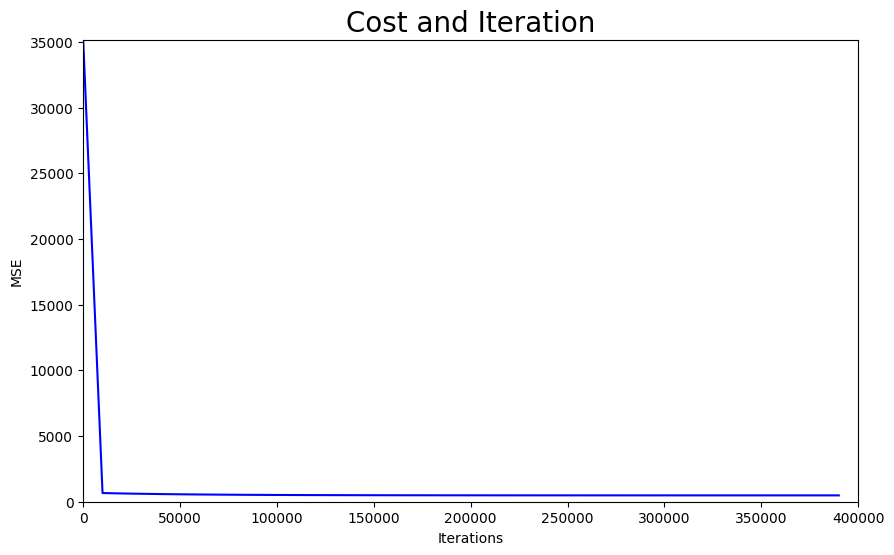

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
#from pythonFile import LinearRegressionGD




df = pd.read_csv("advertising.csv")
y = df[["sales"]]
X = df.drop("sales", axis=1)

#We need to convert X and y to numpy array!
X = np.array(X)
y = np.array(y)
#NOTE: You should apply scaling to X but we won't apply scaling here to compare
#the results with multi linear regression with OLS. If you apply scaling
#you will reach optimal weights with less iterations and probably higher
#learning rate.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)




#Let's try k=5 cross validation with 1.5 million iteration and 0.00003 learning rate.
model_01 = LinearRegressionGD()
model_01.cross_validate(X,y,lr=0.00003, k = 5, iters=1500000, scoring = "r2")
"""
r2 scores : [0.8405939613882959, 0.8316632396590538, 0.9179607264607674, 0.8895877751170918, 0.9262534266509308]
Average r2 : 0.8812118258552278
"""





#Now create another model and apply hold out cross validation(Test-Train)
#Learning rate = 0.00003 and iteration = 400k
model_02 = LinearRegressionGD()
model_02.fit(X_train,y_train, lr=0.00003, iters=400000, bins = 10000, verbose=True)
"""
After 0 iterations: weights = [[0.00082868 0.14048486 0.02208952 0.02668383]], MSE = 35158.580000
After 10000 iterations: weights = [[0.26702634 0.05396424 0.20780189 0.02014562]], MSE = 660.168156
After 20000 iterations: weights = [[0.50734051 0.05331624 0.20513956 0.01854777]], MSE = 629.338507
After 30000 iterations: weights = [[0.72578696 0.05272721 0.20271949 0.01709533]], MSE = 603.864349
After 40000 iterations: weights = [[0.92435558 0.05219178 0.20051964 0.01577505]], MSE = 582.815367
After 50000 iterations: weights = [[1.10485518 0.05170507 0.19851997 0.01457491]], MSE = 565.422855
After 60000 iterations: weights = [[1.26892997 0.05126265 0.19670226 0.01348398]], MSE = 551.051637
After 70000 iterations: weights = [[1.41807456 0.05086049 0.19504996 0.01249232]], MSE = 539.176878
After 80000 iterations: weights = [[1.55364752 0.05049492 0.193548   0.0115909 ]], MSE = 529.364911
After 90000 iterations: weights = [[1.67688385 0.05016262 0.19218273 0.0107715 ]], MSE = 521.257404
After 100000 iterations: weights = [[1.78890611 0.04986055 0.19094168 0.01002667]], MSE = 514.558272
After 110000 iterations: weights = [[1.89073476 0.04958598 0.18981357 0.00934961]], MSE = 509.022862
After 120000 iterations: weights = [[1.98329737 0.04933638 0.18878811 0.00873416]], MSE = 504.449021
After 130000 iterations: weights = [[2.06743713 0.0491095  0.18785597 0.00817472]], MSE = 500.669713
After 140000 iterations: weights = [[2.14392047 0.04890327 0.18700864 0.00766618]], MSE = 497.546917
After 150000 iterations: weights = [[2.2134441  0.0487158  0.18623842 0.00720392]], MSE = 494.966590
After 160000 iterations: weights = [[2.27664134 0.04854539 0.18553829 0.00678373]], MSE = 492.834498
After 170000 iterations: weights = [[2.33408786 0.04839049 0.18490187 0.00640176]], MSE = 491.072776
After 180000 iterations: weights = [[2.38630695 0.04824969 0.18432335 0.00605456]], MSE = 489.617088
After 190000 iterations: weights = [[2.4337743  0.04812169 0.18379749 0.00573895]], MSE = 488.414270
After 200000 iterations: weights = [[2.47692229 0.04800534 0.18331947 0.00545206]], MSE = 487.420397
After 210000 iterations: weights = [[2.51614397 0.04789958 0.18288495 0.00519128]], MSE = 486.599171
After 220000 iterations: weights = [[2.55179662 0.04780345 0.18248997 0.00495422]], MSE = 485.920603
After 230000 iterations: weights = [[2.58420501 0.04771606 0.18213093 0.00473874]], MSE = 485.359911
After 240000 iterations: weights = [[2.61366435 0.04763662 0.18180457 0.00454287]], MSE = 484.896618
After 250000 iterations: weights = [[2.64044301 0.04756442 0.1815079  0.00436482]], MSE = 484.513804
After 260000 iterations: weights = [[2.6647849  0.04749878 0.18123823 0.00420297]], MSE = 484.197490
After 270000 iterations: weights = [[2.68691177 0.04743912 0.18099309 0.00405585]], MSE = 483.936124
After 280000 iterations: weights = [[2.70702517 0.04738488 0.18077026 0.00392211]], MSE = 483.720160
After 290000 iterations: weights = [[2.72530833 0.04733558 0.18056771 0.00380055]], MSE = 483.541712
After 300000 iterations: weights = [[2.74192778 0.04729077 0.18038359 0.00369004]], MSE = 483.394262
After 310000 iterations: weights = [[2.75703493 0.04725003 0.18021623 0.0035896 ]], MSE = 483.272426
After 320000 iterations: weights = [[2.77076738 0.047213   0.18006409 0.00349829]], MSE = 483.171755
After 330000 iterations: weights = [[2.78325023 0.04717934 0.1799258  0.00341529]], MSE = 483.088571
After 340000 iterations: weights = [[2.79459718 0.04714875 0.17980009 0.00333985]], MSE = 483.019838
After 350000 iterations: weights = [[2.8049116  0.04712093 0.17968583 0.00327127]], MSE = 482.963044
After 360000 iterations: weights = [[2.81428745 0.04709565 0.17958196 0.00320893]], MSE = 482.916116
After 370000 iterations: weights = [[2.82281013 0.04707267 0.17948754 0.00315226]], MSE = 482.877340
After 380000 iterations: weights = [[2.83055728 0.04705178 0.17940171 0.00310075]], MSE = 482.845300
After 390000 iterations: weights = [[2.83759946 0.04703279 0.17932369 0.00305393]], MSE = 482.818826
After 400000 iterations: weights = [[2.84400022 0.04701553 0.17925278 0.00301137]], MSE = 482.796953
"""




#Training Results
y_pred = model_02.predict(X_train)
model_02.performance(y_pred,y_train)
"""
RMSE = 21.972640957679957
MSE = 482.7969506551148
MAE = 1.3309826349317408
SSE = 482.7969506551148
SSR = 4191.375065957562
SST = 4638.47975
R-squared = 0.8959148305745832
Adjusted R-squared = 0.8939131927010175
"""




#Test Results
y_pred = model_02.predict(X_test)
model_02.performance(y_pred,y_test)
"""
RMSE = 8.934604140081765
MSE = 79.8271511399662
MAE = 1.044353399952942
SSE = 79.8271511399662
SSR = 688.0835366444755
SST = 742.96775
R-squared = 0.892556371201891
Adjusted R-squared = 0.8836027354687153
"""





model_02.visualize(size = (10,6))
#IMAGE IS BELOW (cost_iteration.png)

After 0 iterations: weights = [[24.86025     3.40410826  3.51735593  4.95713949]], MSE = 35158.580000
After 5 iterations: weights = [[ 8.6359129   7.1169975   4.15379772 -1.02471141]], MSE = 7438.581899
After 10 iterations: weights = [[16.66666278  6.59370776  4.90383833  0.70296709]], MSE = 2071.160556
After 15 iterations: weights = [[12.83927962  6.84929     4.65171459 -0.20460628]], MSE = 845.743302
After 20 iterations: weights = [[14.67005557  6.72692153  4.78179699  0.22217159]], MSE = 565.671808
After 25 iterations: weights = [[13.79488468  6.78540335  4.72045574  0.0175065 ]], MSE = 501.658601
After 30 iterations: weights = [[14.21329411  6.75744255  4.74985714  0.11529674]], MSE = 487.027709
After 35 iterations: weights = [[14.01326159  6.77080989  4.73580761  0.0685402 ]], MSE = 483.683664
After 40 iterations: weights = [[14.10889321  6.76441921  4.74252501  0.09089313]], MSE = 482.919347
After 45 iterations: weights = [[14.06317365  6.76747447  4.73931361  0.0802066 ]], MSE =

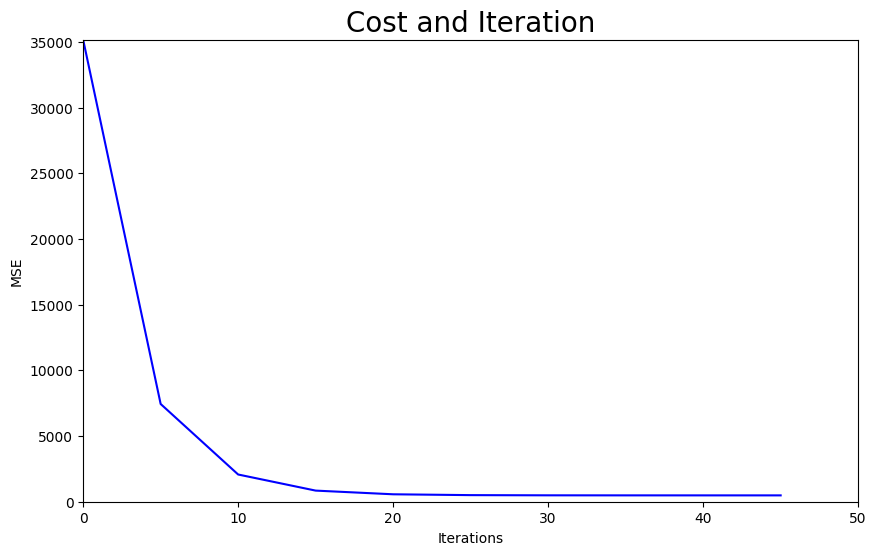

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
#from pythonFile import LinearRegressionGD



df = pd.read_csv("advertising.csv")
y = df[["sales"]]
X = df.drop("sales", axis=1)



#Scale X
rs = RobustScaler()
X_scaled = rs.fit_transform(X)

#Convert X and y to numpy array
X_scaled = np.array(X_scaled)
y = np.array(y)

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=1)





#Learning rate = 0.9
#Number of iteration = 50
model_03 = LinearRegressionGD()
model_03.fit(X_train,y_train, lr=0.9, iters=50, bins = 5, verbose=True)
"""
After 0 iterations: weights = [[24.86025     3.40410826  3.51735593  4.95713949]], MSE = 35158.580000
After 5 iterations: weights = [[ 8.6359129   7.1169975   4.15379772 -1.02471141]], MSE = 7438.581899
After 10 iterations: weights = [[16.66666278  6.59370776  4.90383833  0.70296709]], MSE = 2071.160556
After 15 iterations: weights = [[12.83927962  6.84929     4.65171459 -0.20460628]], MSE = 845.743302
After 20 iterations: weights = [[14.67005557  6.72692153  4.78179699  0.22217159]], MSE = 565.671808
After 25 iterations: weights = [[13.79488468  6.78540335  4.72045574  0.0175065 ]], MSE = 501.658601
After 30 iterations: weights = [[14.21329411  6.75744255  4.74985714  0.11529674]], MSE = 487.027709
After 35 iterations: weights = [[14.01326159  6.77080989  4.73580761  0.0685402 ]], MSE = 483.683664
After 40 iterations: weights = [[14.10889321  6.76441921  4.74252501  0.09089313]], MSE = 482.919347
After 45 iterations: weights = [[14.06317365  6.76747447  4.73931361  0.0802066 ]], MSE = 482.744655
After 50 iterations: weights = [[14.06976731  6.76703384  4.73977676  0.08174781]], MSE = 482.708789
"""




#Training Results
y_pred = model_03.predict(X_train)
model_03.performance(y_pred,y_train)
"""
RMSE = 21.970542254675976
MSE = 482.7047269645026
MAE = 1.330583310235389
SSE = 482.7047269645026
SSR = 4155.345351811815
SST = 4638.47975
R-squared = 0.8959347128842154
Adjusted R-squared = 0.8939334573627581
"""




#Test Results
y_pred = model_03.predict(X_test)
model_03.performance(y_pred,y_test)
"""
RMSE = 8.925689122192612
MSE = 79.66792630602751
MAE = 1.0416834408256292
SSE = 79.66792630602751
SSR = 682.7324069350907
SST = 742.96775
R-squared = 0.8927706804150954
Adjusted R-squared = 0.8838349037830201
"""




model_03.visualize(size = (10,6), left = 0)
#IMAGE IS BELOW (cost_iteration_02.png)

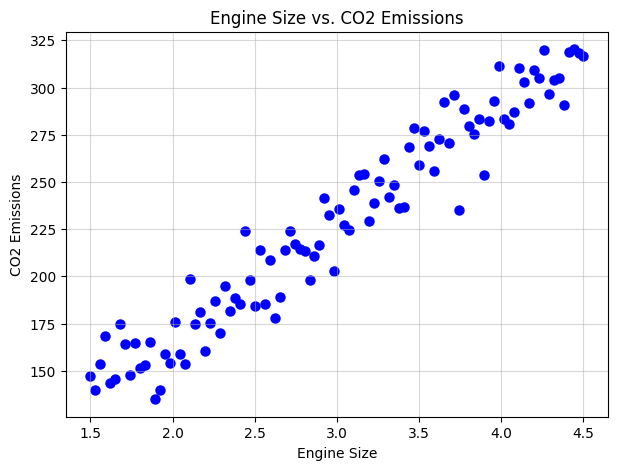

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Generate realistic engine sizes and corresponding CO2 emissions
# 100 engine sizes from 1.5 to 4.5
engine_sizes = np.linspace(1.5, 4.5, 100)
slope = 60
intercept = 50

# Adding random noise
noise = np.random.normal(0, 15, size=engine_sizes.shape)
co2_emissions = slope * engine_sizes + intercept + noise

# Create a DataFrame
df = pd.DataFrame({'Engine_size': engine_sizes,
                   'CO2_Emissions': co2_emissions})

df.head()

plt.figure(figsize=(7, 5))
plt.scatter(df['Engine_size'], df['CO2_Emissions'],
            color='b', edgecolors='b', linewidths=1.5)
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.title('Engine Size vs. CO2 Emissions')
plt.grid(alpha=0.5)
plt.show()

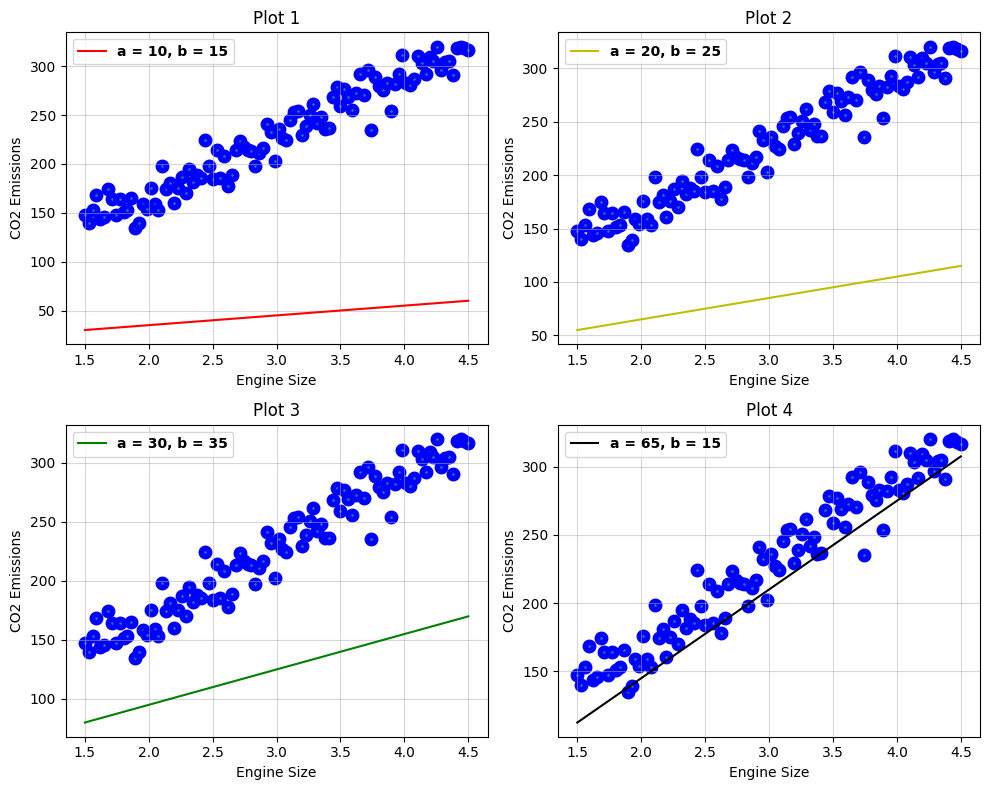

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Prepare the plot
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
legend_properties = {'weight': 'bold'}

# Define the different a and b parameters for the plots
params = [
    (10, 15, 'r'),
    (20, 25, 'y'),
    (30, 35, 'g'),
    (65, 15, 'k')
]

# Loop through and create each subplot
for i, ax in enumerate(axs.flatten()):
    a, b, color = params[i]
    x = np.linspace(1.5, 4.5, 100)  # Define the range for Engine_size

    # Scatter plot
    x_scatter = df['Engine_size']
    y_scatter = df['CO2_Emissions']
    ax.scatter(x_scatter, y_scatter, edgecolors='b', linewidths=4.)

    # Linear regression line
    y = a * x + b
    ax.plot(x, y, color, label=f'a = {a}, b = {b}')

    # Labels and grid
    ax.set_xlabel('Engine Size')
    ax.set_ylabel('CO2 Emissions')
    ax.legend(prop=legend_properties)
    ax.grid(alpha=0.5)
    ax.set_title(f'Plot {i + 1}')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

def mae_loss(y_pred, y_true):
    """
    Compute the Mean Absolute Error (MAE) between predicted and true values.

    Parameters:
    y_pred (numpy.ndarray): Predicted values.
    y_true (numpy.ndarray): True values.

    Returns:
    float: The Mean Absolute Error.

    Raises:
    ValueError: If inputs are not NumPy arrays or have mismatched shapes.
    """
    # Input validation
    if not isinstance(y_pred, np.ndarray) or not isinstance(y_true, np.ndarray):
        raise ValueError("Inputs must be NumPy arrays.")

    if y_pred.shape != y_true.shape:
        raise ValueError("Input arrays must have the same shape.")

    if y_true.size == 0:
        raise ValueError("Input arrays must not be empty.")

    # Compute the Mean Absolute Error
    loss = np.mean(np.abs(y_pred - y_true))

    return loss


In [ ]:
import numpy as np

def mse_loss(y_pred, y_true):
    """
    Compute the Mean Squared Error (MSE) between predicted and true values.

    Parameters:
    y_pred (numpy.ndarray): Predicted values.
    y_true (numpy.ndarray): True values.

    Returns:
    float: The Mean Squared Error.

    Raises:
    ValueError: If inputs are not NumPy arrays or have mismatched shapes.
    """
    # Input validation
    if not isinstance(y_pred, np.ndarray) or not isinstance(y_true, np.ndarray):
        raise ValueError("Inputs must be NumPy arrays.")

    if y_pred.shape != y_true.shape:
        raise ValueError("Input arrays must have the same shape.")

    if y_true.size == 0:
        raise ValueError("Input arrays must not be empty.")

    # Compute the Mean Squared Error
    loss = np.mean((y_pred - y_true) ** 2)

    return loss